In [1]:
import gzip
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:


with gzip.open('cleaned_data.zip','rb') as file:
    feature_data = pd.read_csv(file,index_col=[0,1])

with gzip.open('new_label_data.zip','rb') as file:
    new_label_data = pd.read_csv(file,index_col=[0,1])

data = pd.concat([feature_data,new_label_data],ignore_index=False,axis=1)





In [100]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(317344, 10, 5)
(16703, 10, 5)
(317344,)
(16703,)


In [56]:

# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 5

units = 128
output_size = 7  # labels are from 0 to 6

# Build the RNN model
def build_model():
    lstm_layer = keras.layers.LSTM(units, input_shape=(None,input_dim))
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.Dropout(0.1),
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [57]:
model = build_model()
model.summary()
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"]
)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               68608     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 70,023
Trainable params: 69,767
Non-trainable params: 256
_________________________________________________________________


In [60]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
X_train, X_test_list, Y_train, Y_test_list = train_test_split(X,Y,test_size= 0.05,random_state=16,shuffle=True)
X_train = tf.reshape(X_train,(-1,10,5))
X_test_list = tf.reshape(X_test_list,(-1,10,5))
batch_size = int(len(X_train)//10000)
LSTM_model = model.fit(X_train, Y_train, validation_data=(X_test_list, Y_test_list), batch_size=batch_size, epochs=2)

Epoch 1/2
 3073/10237 [========>.....................] - ETA: 1:05 - loss: 1.3819 - accuracy: 0.4808

In [59]:
for uuid in data.groupby('uuid').count().index:

    X = data.loc[uuid].iloc[:,:-1].values
    Y = data.loc[uuid].iloc[:,-1].values
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.05,random_state=6,shuffle=False)
    X_train = tf.reshape(X_train,(-1,10,5))

    batch_size = int(len(X_train)//1000)
    LSTM_model = model.fit(X_train, Y_train, validation_data=(X_test_list, Y_test_list), batch_size=batch_size, epochs=1)



1069/1079 [============================>.] - ETA: 0s - loss: 1.0543 - accuracy: 0.5990

KeyboardInterrupt: 

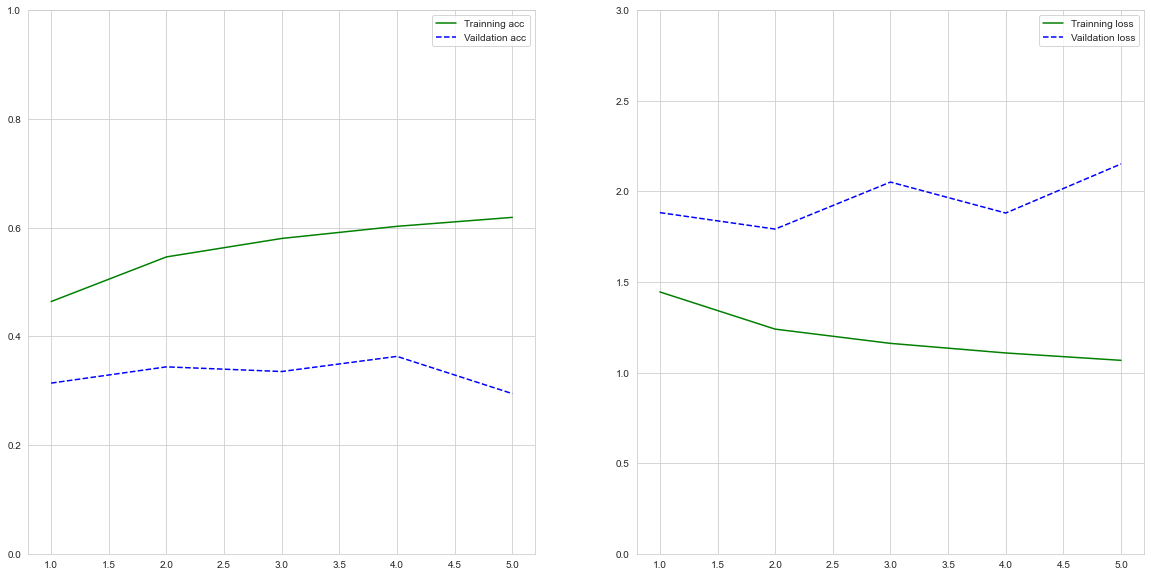

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns  
sns.set_style("whitegrid") 


acc = LSTM_model.history['accuracy']     #获取训练集准确性数据
val_acc = LSTM_model.history['val_accuracy']    #获取验证集准确性数据
loss = LSTM_model.history['loss']          #获取训练集错误值数据
val_loss = LSTM_model.history['val_loss']  #获取验证集错误值数据
epochs = range(1,len(acc)+1)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax1.plot(epochs,acc,'g',label='Trainning acc')     #以epochs为横坐标，以训练集准确性为纵坐标
ax1.plot(epochs,val_acc,'b--',label='Vaildation acc') #以epochs为横坐标，以验证集准确性为纵坐标
ax1.legend()   #绘制图例，即标明图中的线段代表何种含义
plt.ylim(0,1)
ax2 = fig.add_subplot(122)
ax2.plot(epochs,loss,'g',label='Trainning loss')
ax2.plot(epochs,val_loss,'b--',label='Vaildation loss')
ax2.legend()  ##绘制图例，即标明图中的线段代表何种含义
plt.ylim(0,3)
plt.show()
